# Examples

`Graph` and `Digraph` objects have a `_repr_svg_()` method so that they can be rendered and displayed directly in a Jupyter notebook.

## Simple example

In [1]:
import graphviz

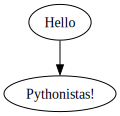

In [2]:
dot = graphviz.Digraph("hello-pythonistas", comment="Hello world example")

dot.edge("Hello", "Pythonistas!")

dot

You can also display the source code with:

In [3]:
print(dot.source)

// Hello world example
digraph "hello-pythonistas" {
	Hello -> "Pythonistas!"
}



It is also possible to output the comment or other elements of the source text, for example with:

In [4]:
print(dot.comment)

Hello world example


You can also use data from a pandas DataFrame, for example:

In [5]:
import pandas as pd


j = {
    "action": [
        "single use",
        "teamwork",
        "convert",
        "Java, R, Julia etc.",
        "extend",
    ],
    "view": ["Jupyter", "JupyterHub", "nbconvert", "kernels", "extensions"],
}

df = pd.DataFrame(j)

df

action        view
0           single use     Jupyter
1             teamwork  JupyterHub
2              convert   nbconvert
3  Java, R, Julia etc.     kernels
4               extend  extensions

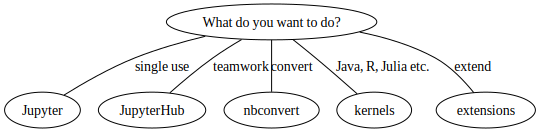

In [6]:
jm = graphviz.Graph("jupyter_moons", comment="Jupyter moons")

jm.node("What do you want to do?")

for index, row in df.iterrows():
    jm.edge(
        "What do you want to do?", str(row["view"]), label=(str(row["action"]))
    )

jm

## Styling

You can use `graph_attr`, `node_attr` and `edge_attr` arguments of the `Graph` and `Digraph` constuctors to change the `default attributes of Graphviz](https://www.graphviz.org/doc/info/attrs.html) for your graphs, nodes and edges, for example:

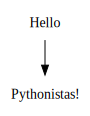

In [7]:
dot = graphviz.Digraph(
    "hello-pythonistas",
    comment="Hello world example",
    node_attr={"shape": "plaintext"},
)

dot.edge("Hello", "Pythonistas!")

dot

The `graph_attr`-, `node_attr`- and `edge_attr` arguments can also be applied to instances:

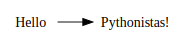

In [8]:
dot.graph_attr["rankdir"] = "LR"

dot

To add `att_stmt` statements directly, call the `attr()` attr() method of the `Graph` or `Digraph` instance with the desired target as the first argument and the attributes as the keyword argument.

<div class="alert alert-block alert-info">

**Hinweis:**

Attribute statements affect all subsequent graphs, nodes or edges within the same (sub)graph.
</div>

## Engines

In addition to Dot, various other [layout engines](https://graphviz.org/docs/layouts/) can also be used.

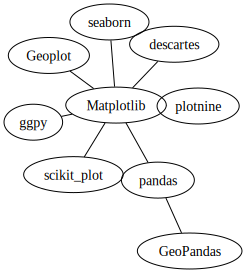

In [9]:
pvl = graphviz.Graph("python_visualisation_landscape", engine="neato")

pvl.edge("Matplotlib", "pandas")
pvl.edge("pandas", "GeoPandas")
pvl.edge("Matplotlib", "Geoplot")
pvl.edge("Matplotlib", "descartes")
pvl.edge("Matplotlib", "seaborn")
pvl.edge("Matplotlib", "ggpy")
pvl.edge("Matplotlib", "plotnine")
pvl.edge("Matplotlib", "scikit_plot")

pvl

You can also change the `engine` attribute of an existing instance:

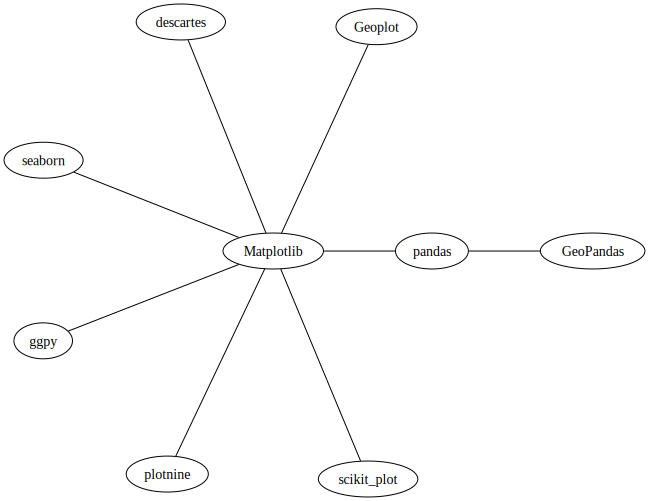

In [10]:
pvl.engine = "circo"

pvl

You can get a complete overview of the engines with:

In [11]:
for engine in sorted(graphviz.ENGINES):
    print(engine)

circo
dot
fdp
neato
osage
patchwork
sfdp
twopi


## Read and write files

In [12]:
pvl.save()

'python_visualisation_landscape.gv'

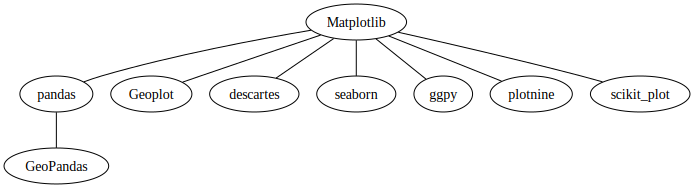

In [13]:
graphviz.Source.from_file("python_visualisation_landscape.gv")

## Converting dot files

A dot file can be converted to another format, such as PDF, PNG, SVG etc., with `render`:

In [14]:
from graphviz import render


render("dot", "svg", "python_visualisation_landscape.gv")

'python_visualisation_landscape.gv.svg'

<div class="alert alert-info">
    
**Siehe auch:**

* [graphviz manual](https://graphviz.readthedocs.io/en/stable/manual.html#jupyter-notebooks)
* [examples/graphviz-notebook](https://nbviewer.org/github/xflr6/graphviz/blob/master/examples/graphviz-notebook.ipynb)
* [examples/graphviz-engines](https://nbviewer.org/github/xflr6/graphviz/blob/master/examples/graphviz-engines.ipynb)
* [examples/graphviz-escapes.ipynb](https://nbviewer.org/github/xflr6/graphviz/blob/master/examples/graphviz-escapes.ipynb)
* [Graphviz Online](https://dreampuf.github.io/GraphvizOnline/)
</div>